In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Input Data
input_data = np.array([[0,0],[0,1],[1,0],[1,1]])
exp_output = np.array([[0,1,1,1]]).T

In [3]:
# Function Definitions of sigmoid and sigmoid derivative
def sigmoid(x):
    return 1/(1+np.exp(-x))
    
def sigmoid_d(x):
    return sigmoid(x)*(1-sigmoid(x))

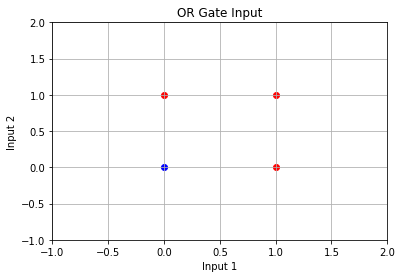

In [4]:
# Ploting the input data
plt.axis([-1, 2, -1, 2])
plt.grid()
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.title("OR Gate Input")

for i in range(len(input_data)):
    point = input_data[i]
    color = "r"
    
    if (exp_output[i] == 0):
        color = "b"
    plt.scatter(point[0], point[1], c = color)

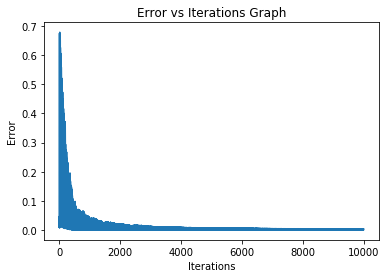

In [5]:
# training loop
weights = np.array([np.random.randn(), np.random.randn()])
b = np.random.randn()

learning_rate = 0.2
errors = []

for i in range(10000):
    # Select random input
    ri = np.random.randint(len(input_data))
    point = input_data[ri]
    
    # Get prediction and Activation Result
    z = np.dot(point,weights)+b
    pred = sigmoid(z)
    
    # Calculate Error
    target = exp_output[ri]
    error = np.square(pred-target)
    errors.append(error)
    
    # Get differentiated error function
    dcost_dz = 2*(pred-target)*sigmoid_d(z) 
    dcostWeights = dcost_dz*point
    
    # Correct Error with learning rate
    weights = weights - learning_rate * dcostWeights
    b = b - learning_rate * dcost_dz

# Ploting Error
plt.title("Error vs Iterations Graph")
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.plot(errors)

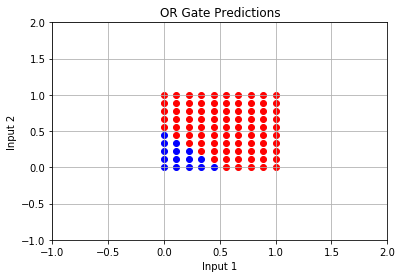

In [6]:
# Testing inputs
testX = np.linspace(0, 1, 10)
testY = np.linspace(0, 1, 10)

plt.axis([-1, 2, -1, 2])
plt.grid()
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.title("OR Gate Predictions")

for i in testX:
    for j in testY:
        z = np.dot([i,j],weights) + b
        pred = sigmoid(z)
        
        color = 'b'
        if pred>0.5:
            color = 'r'
        
        plt.scatter(i, j, c = color)